In [1]:
import sqlite3

# Connect to SQLite database (creates file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        date TEXT NOT NULL,
        customer_name TEXT NOT NULL,
        product TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL
    )
''')

# Optional: Insert a few sample records
sample_data = [
    ('2025-05-01', 'Alice Smith', 'Widget A', 3, 19.99),
    ('2025-05-01', 'Bob Johnson', 'Widget B', 2, 24.99),
    ('2025-04-30', 'Charlie Lee', 'Widget A', 1, 19.99)
]

cursor.executemany('''
    INSERT INTO sales (date, customer_name, product, quantity, price)
    VALUES (?, ?, ?, ?, ?)
''', sample_data)

# Commit and close
conn.commit()
conn.close()

print("sales_data.db created successfully with one 'sales' table.")


sales_data.db created successfully with one 'sales' table.


Total Sales by Product:
Widget A: $79.96
Widget B: $49.98


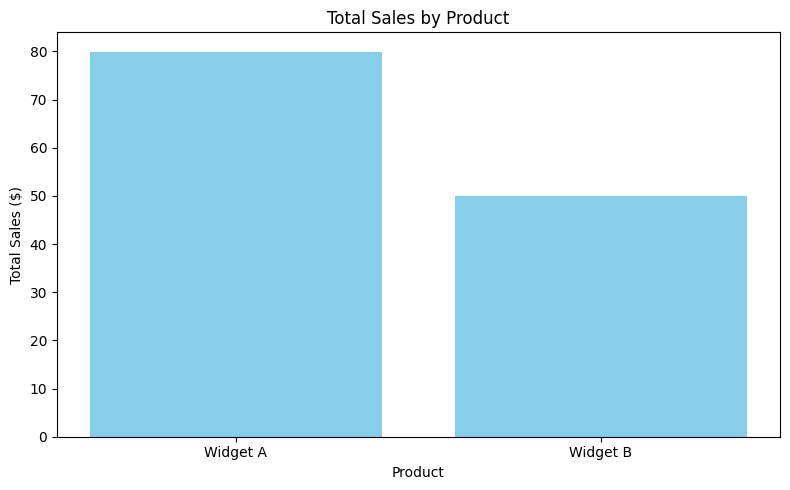

In [2]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Query 1: Total sales amount by product
cursor.execute('''
    SELECT product, SUM(quantity * price) as total_sales
    FROM sales
    GROUP BY product
''')
results = cursor.fetchall()

# Print results
print("Total Sales by Product:")
for product, total in results:
    print(f"{product}: ${total:.2f}")

# Extract data for the chart
products = [row[0] for row in results]
sales = [row[1] for row in results]

# Plotting with matplotlib
plt.figure(figsize=(8, 5))
plt.bar(products, sales, color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


In [4]:
conn = sqlite3.connect('sales_data.db')
query = "SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product"
import pandas as pd
df=pd.read_sql_query(query,conn)
df

,product,total_qty,revenue
0,Widget A,4,79.96
1,Widget B,2,49.98


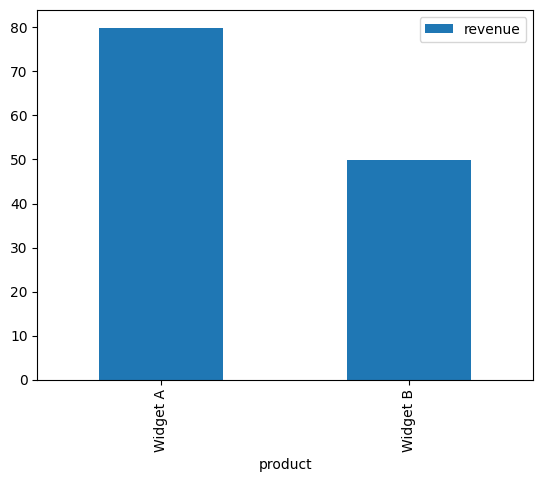

In [10]:
df.plot(kind='bar', x='product', y='revenue')
plt.savefig("sales_chart.png")